In [39]:
import pandas as pd
import numpy as np


In [40]:


# Try reading with 'latin1' encoding
df = pd.read_csv("spam.csv", encoding='latin1')


In [41]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
df.shape

(5572, 5)

In [43]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [44]:
df.rename(columns={'v1' : 'target', 'v2' : 'text'},inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [46]:
df['target']=encoder.fit_transform(df['target'])

In [47]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [48]:
df.duplicated().sum()

403

In [49]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [50]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

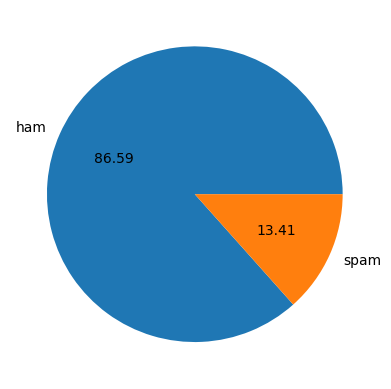

In [51]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [52]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# Apply tokenizer to DataFrame column
df['num_words']=df['text'].apply(lambda x: len(tokenizer.tokenize(str(x))))


In [53]:
df['num_characters']=df['text'].apply(len)

In [54]:
df.head()

,target,text,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",23,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [55]:
import re

def naive_sentence_split(text):
    sentences = re.split(r'[.!?]+(?:\s+|$)', text)
    return [s for s in sentences if s.strip()]

df['num_sentences'] = df['text'].apply(lambda x: len(naive_sentence_split(str(x))))

In [56]:
df.head()

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",23,111,3
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155,2
3,0,U dun say so early hor... U c already then say...,13,49,2
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [57]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,16.563731,1.925803
std,58.016023,13.315852,1.408150
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,21.000000,2.000000
max,910.000000,214.000000,31.000000


In [58]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,26.492637,3.104418
std,29.183082,6.436607,1.613389
min,13.000000,2.000000,1.000000
25%,132.500000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,31.000000,4.000000
max,224.000000,41.000000,9.000000


In [59]:
import seaborn as se


In [60]:
mf=df.drop(columns=['text'])

<Axes: >

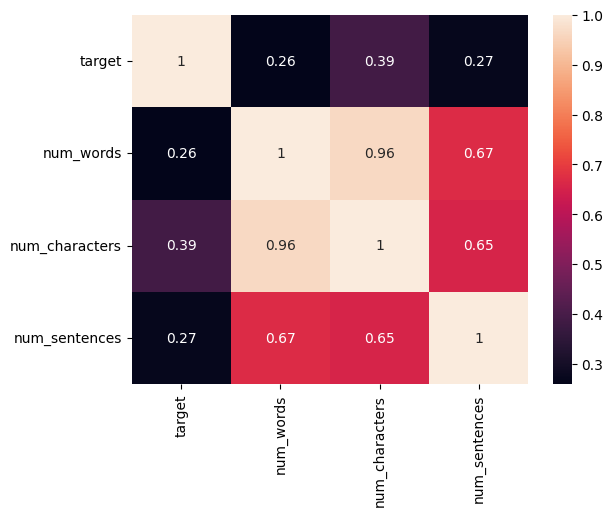

In [61]:
se.heatmap(mf.corr(),annot=True)

In [62]:
import string,nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform(text):
    text=text.lower()
    text=tokenizer.tokenize(str(text))
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
transform("Did you like my pesentation in machine learning?")

'like pesent machin learn'

In [64]:
df['transformed_text']=df['text'].apply(transform)

In [ ]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",23,111,3,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [66]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

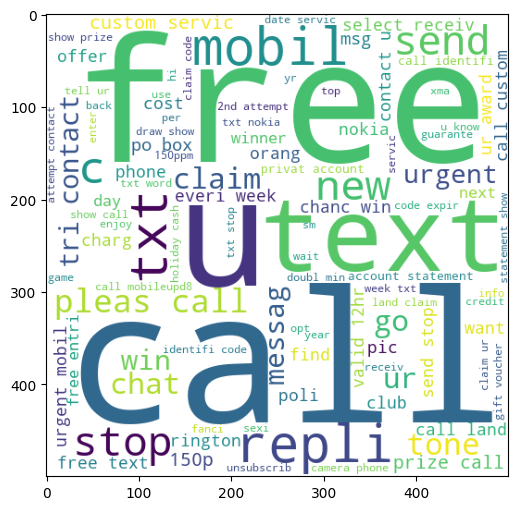

In [67]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [68]:
sc=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        sc.append(word)

In [69]:
len(sc)

10779

In [70]:
lc=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        lc.append(word)

C:\Users\praty\AppData\Local\Temp\ipykernel_18744\938728521.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  se.barplot(x='item', y='count', data=gf,palette=colors)


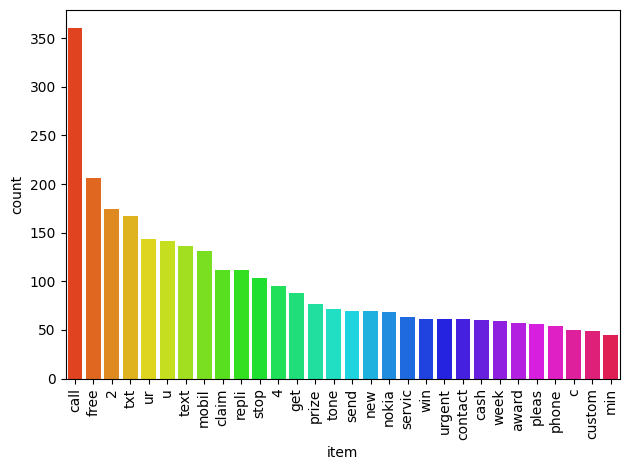

In [71]:
from collections import Counter
# Count the 30 most common items
counter = Counter(sc).most_common(30)

# Convert to DataFrame
gf = pd.DataFrame(counter, columns=['item', 'count'])
colors = se.color_palette("hsv", len(gf))
# Plot using seaborn
se.barplot(x='item', y='count', data=gf,palette=colors)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

C:\Users\praty\AppData\Local\Temp\ipykernel_18744\943047706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  se.barplot(x='item', y='count', data=hf,palette=colors)


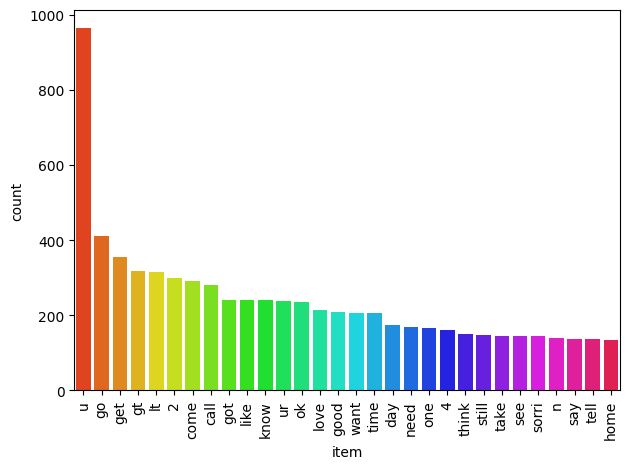

In [72]:
counter = Counter(lc).most_common(30)

# Convert to DataFrame
hf = pd.DataFrame(counter, columns=['item', 'count'])
colors = se.color_palette("hsv", len(hf))
# Plot using seaborn
se.barplot(x='item', y='count', data=hf,palette=colors)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [74]:
X=df['transformed_text']

In [75]:
y = df['target']

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

In [102]:
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [165]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [166]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8322869955156951
[[802 155]
 [ 32 126]]
0.7974683544303798
0.4483985765124555


In [168]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred2))

0.9632286995515695
[[956   1]
 [ 40 118]]
0.7974683544303798
0.9915966386554622


In [169]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred3))


0.9704035874439462
[[957   0]
 [ 33 125]]
0.7974683544303798
1.0


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [110]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [112]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9704035874439462
Precision -  0.9562043795620438
For  KN
Accuracy -  0.9022421524663677
Precision -  1.0
For  NB
Accuracy -  0.9632286995515695
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9201793721973094
Precision -  0.8876404494382022
For  LR
Accuracy -  0.9488789237668162
Precision -  0.9316239316239316
For  RF
Accuracy -  0.9695067264573991
Precision -  1.0
For  AdaBoost
Accuracy -  0.9103139013452914
Precision -  0.8625
For  BgC
Accuracy -  0.9605381165919282
Precision -  0.9523809523809523
For  ETC
Accuracy -  0.9704035874439462
Precision -  1.0
For  GBDT
Accuracy -  0.9390134529147982
Precision -  0.9591836734693877
For  xgb
Accuracy -  0.9614349775784753
Precision -  0.967479674796748


In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [114]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902242,1.000000
5,RF,0.969507,1.000000
8,ETC,0.970404,1.000000
2,NB,0.963229,0.991597
10,xgb,0.961435,0.967480
9,GBDT,0.939013,0.959184
0,SVC,0.970404,0.956204
7,BgC,0.960538,0.952381
4,LR,0.948879,0.931624
3,DT,0.920179,0.887640


In [115]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [116]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.902242
1,RF,Accuracy,0.969507
2,ETC,Accuracy,0.970404
3,NB,Accuracy,0.963229
4,xgb,Accuracy,0.961435
5,GBDT,Accuracy,0.939013
6,SVC,Accuracy,0.970404
7,BgC,Accuracy,0.960538
8,LR,Accuracy,0.948879
9,DT,Accuracy,0.920179


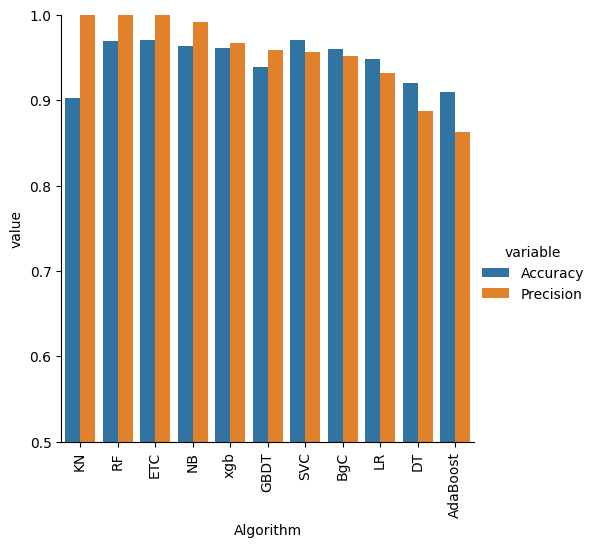

In [117]:
se.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [119]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.902242,1.000000
5,RF,0.969507,1.000000
8,ETC,0.970404,1.000000
2,NB,0.963229,0.991597
10,xgb,0.961435,0.967480
9,GBDT,0.939013,0.959184
0,SVC,0.970404,0.956204
7,BgC,0.960538,0.952381
4,LR,0.948879,0.931624
3,DT,0.920179,0.887640


In [120]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [121]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.902242,1.000000,0.902242,1.000000
1,RF,0.969507,1.000000,0.969507,1.000000
2,ETC,0.970404,1.000000,0.970404,1.000000
3,NB,0.963229,0.991597,0.963229,0.991597
4,xgb,0.961435,0.967480,0.961435,0.967480
5,GBDT,0.939013,0.959184,0.939013,0.959184
6,SVC,0.970404,0.956204,0.970404,0.956204
7,BgC,0.960538,0.952381,0.960538,0.952381
8,LR,0.948879,0.931624,0.948879,0.931624
9,DT,0.920179,0.887640,0.920179,0.887640


In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [123]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.902242,1.000000
5,RF,0.969507,1.000000
8,ETC,0.970404,1.000000
2,NB,0.963229,0.991597
10,xgb,0.961435,0.967480
9,GBDT,0.939013,0.959184
0,SVC,0.970404,0.956204
7,BgC,0.960538,0.952381
4,LR,0.948879,0.931624
3,DT,0.920179,0.887640


In [124]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [125]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.902242,1.000000,0.902242,1.000000,0.902242,1.000000
1,RF,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
2,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
3,NB,0.963229,0.991597,0.963229,0.991597,0.963229,0.991597
4,xgb,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480
5,GBDT,0.939013,0.959184,0.939013,0.959184,0.939013,0.959184
6,SVC,0.970404,0.956204,0.970404,0.956204,0.970404,0.956204
7,BgC,0.960538,0.952381,0.960538,0.952381,0.960538,0.952381
8,LR,0.948879,0.931624,0.948879,0.931624,0.948879,0.931624
9,DT,0.920179,0.887640,0.920179,0.887640,0.920179,0.887640


In [126]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [127]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.902242,1.000000,0.902242,1.000000,0.902242,1.000000,0.902242,1.000000
1,RF,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
2,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
3,NB,0.963229,0.991597,0.963229,0.991597,0.963229,0.991597,0.963229,0.991597
4,xgb,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480,0.961435,0.967480
5,GBDT,0.939013,0.959184,0.939013,0.959184,0.939013,0.959184,0.939013,0.959184
6,SVC,0.970404,0.956204,0.970404,0.956204,0.970404,0.956204,0.970404,0.956204
7,BgC,0.960538,0.952381,0.960538,0.952381,0.960538,0.952381,0.960538,0.952381
8,LR,0.948879,0.931624,0.948879,0.931624,0.948879,0.931624,0.948879,0.931624
9,DT,0.920179,0.887640,0.920179,0.887640,0.920179,0.887640,0.920179,0.887640


In [128]:
# on comparing ETC max features=3000 with or without scaling giving best results

In [129]:
from sklearn.ensemble import VotingClassifier,BaggingClassifier,StackingClassifier
estimators = [('RF',rfc),('ETC',etc),('NB',mnb),('LR',lrc)]
clf4= VotingClassifier(estimators=estimators)

In [130]:
c=train_classifier(clf4,X_train,y_train,X_test,y_test)

In [69]:
c

(0.9632286995515695, 1.0)

In [70]:
cl=BaggingClassifier(  estimator=ExtraTreesClassifier(n_estimators=50,random_state=2),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=2)

In [71]:
c=train_classifier(clf,X_train,y_train,X_test,y_test)

In [72]:
c

(0.9587443946188341, 0.9745762711864406)

In [152]:
import pickle
pickle.dump(mnb,open('model1.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [153]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict("“Congratulations! You’ve won $10,000. Click here to claim your prize: [link]")
    # accuracy = accuracy_score(y_test,y_pred)
    # precision = precision_score(y_test,y_pred)
    
    # return accuracy,precision
    return y_pred

In [155]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
import nltk
from nltk.stem.porter import PorterStemmer
nltk.data.path.append("/home/render/.nltk_data")
nltk.download('stopwords')
ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = TreebankWordTokenizer().tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
input_sms= "Get 70% off on all electronics today only! Shop now: [link]"

In [163]:
transformed_sms = transform_text(input_sms)
    # 2. vectorize
vector_input = tfidf.transform([transformed_sms])
    # 3. predict
result = model.predict(vector_input)[0]

In [164]:
print(result)

0
